In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,classification_report

from tensorflow.keras.utils import to_categorical
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")


In [2]:
cifar = tf.keras.datasets.cifar10

Veri setimizi eğitim ve test seti olarak ayıralım.

In [3]:
(X_train,y_train),(X_test,y_test) = cifar.load_data()

170498071/170498071 [==============================] - 3s 0us/step


Eğitim setimizin boyutları

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

Test setimizin boyutları

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_test.shape

(10000, 1)

Verileri Görselleştirelim

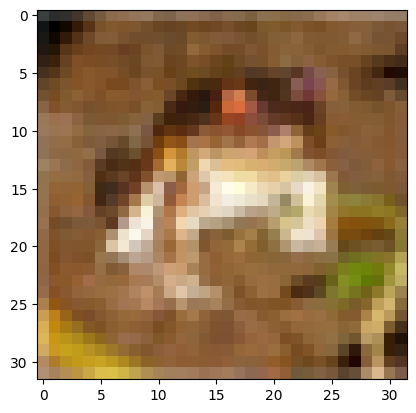

In [ ]:
plt.figure()
plt.imshow(X_train[0])
#plt.colorbar()
plt.grid(False)
plt.show()

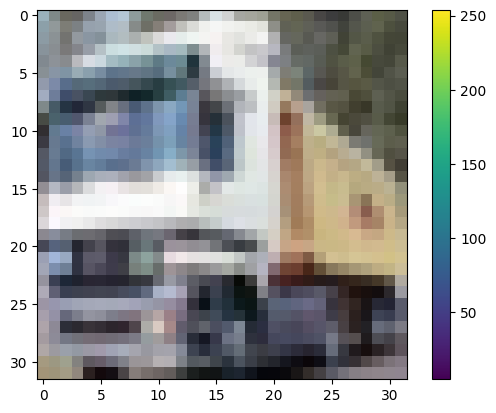

In [ ]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()
plt.grid(False)
plt.show()

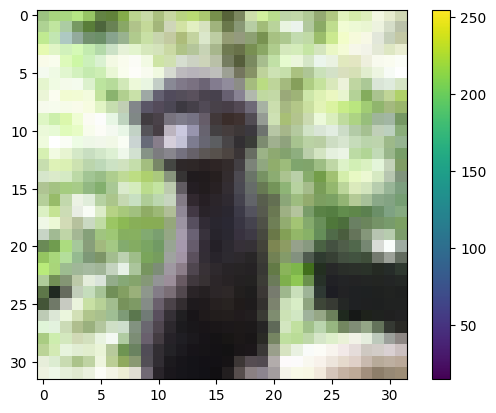

In [ ]:
plt.figure()
plt.imshow(X_train[55])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
## Verilerimizi 0-1 arasına sıkıştırmak için X_train ve X_test değerlerimizi max değer olan 255 e bölelim
X_train = X_train/255.0
X_test = X_test/255.0

55 verinin görseli

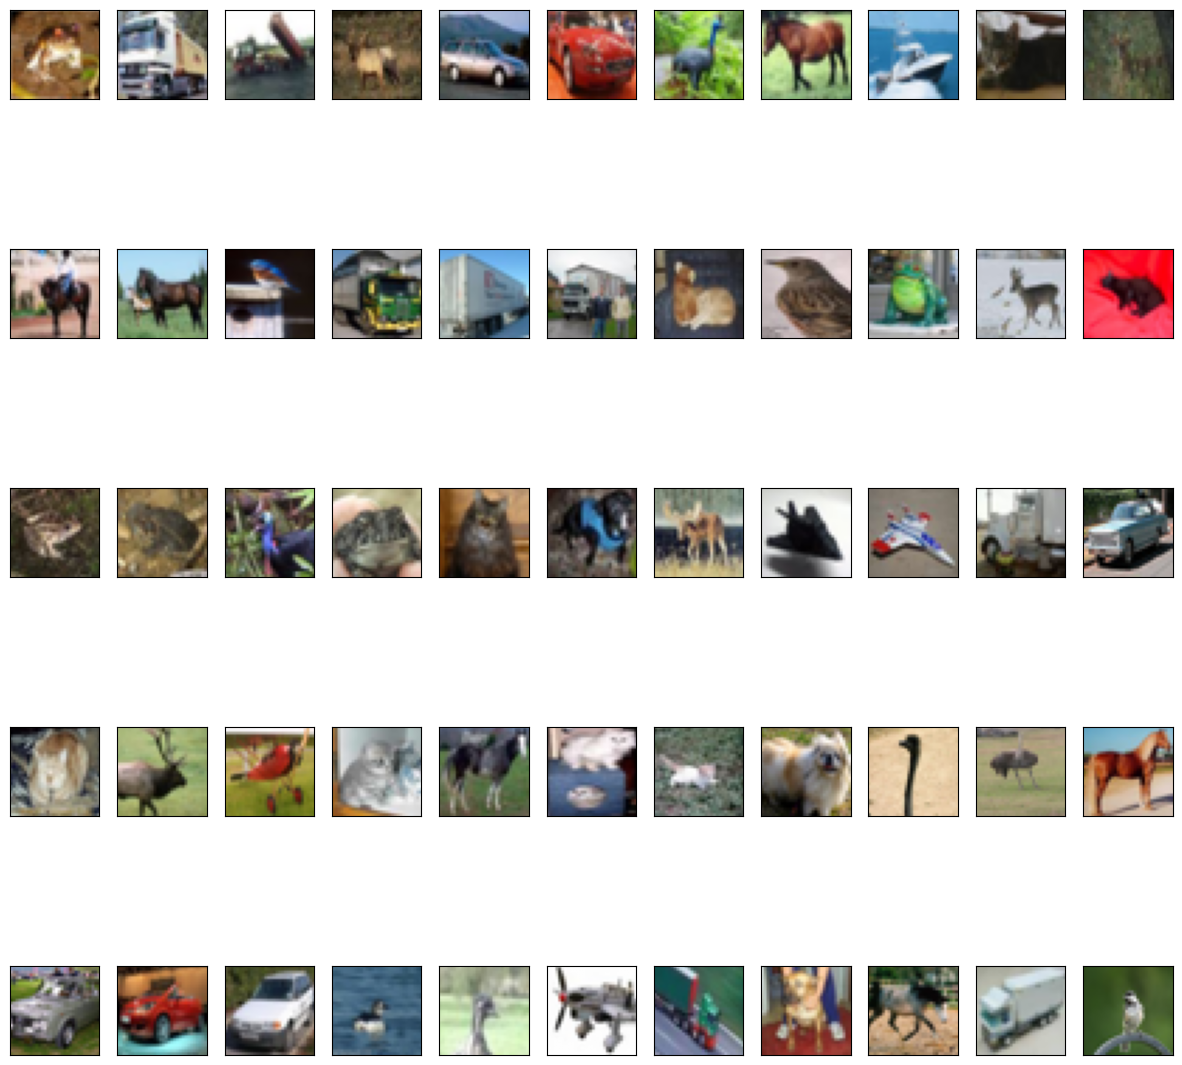

In [ ]:
plt.figure(figsize=(15,15))

for i in range(55):
    plt.subplot(5,11,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()

In [31]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

KNN modeli oluşturalım

In [ ]:
#KNN modeli oluşturalım
knnmodel = KNeighborsClassifier().fit(X_train,y_train)

In [ ]:
# Test verisiyle tahmin yapalım
y_pred = knnmodel.predict(X_test)

# Doğruluk, kesinlik, duyarlılık ve f1 puanını bulalım
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred, average='weighted')
recall=recall_score(y_test,y_pred, average='weighted')
precision=precision_score(y_test,y_pred, average='weighted')

In [ ]:
acc

0.3398

In [ ]:
f1

0.3260170986061005

In [ ]:
recall

0.3398

In [ ]:
precision

0.4304261825528496

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[537,   4, 117,  13,  59,   7,  26,   5, 225,   7],
       [139, 205, 110,  42, 155,  36,  61,  10, 217,  25],
       [107,   3, 452,  52, 226,  34,  66,   8,  49,   3],
       [ 70,   8, 234, 217, 193, 115,  95,  17,  46,   5],
       [ 64,   1, 262,  35, 514,  21,  41,   7,  53,   2],
       [ 71,   3, 227, 155, 187, 220,  66,  14,  51,   6],
       [ 27,   2, 273,  68, 314,  37, 248,   2,  28,   1],
       [ 93,  10, 181,  50, 280,  52,  53, 210,  67,   4],
       [141,  14,  52,  38,  54,  16,  14,   8, 655,   8],
       [153,  67,  98,  68, 124,  23,  46,  29, 252, 140]])

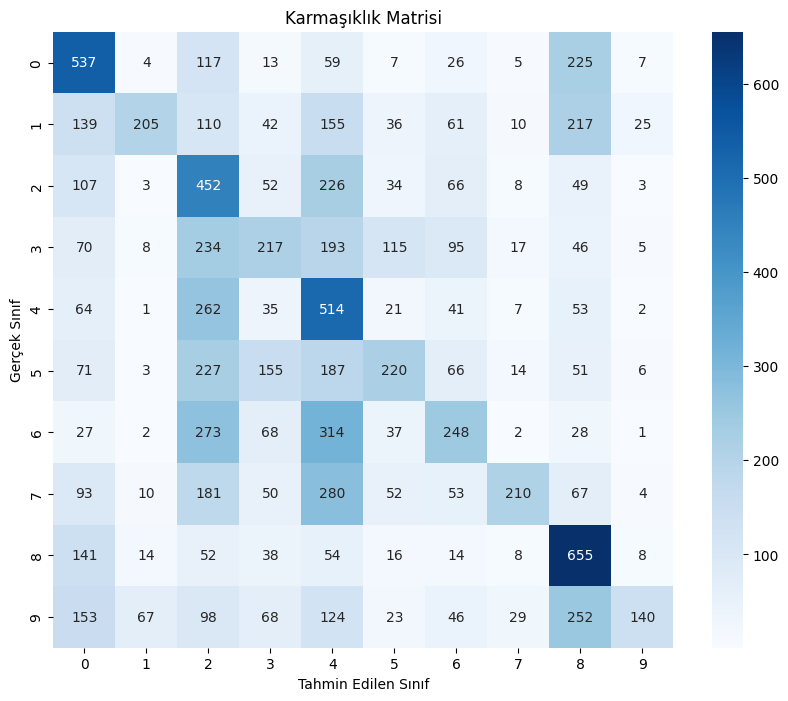

In [ ]:
# Matrisi görselleştirin
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True,fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()

SVR modeli oluşturalım

In [62]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [60]:
# Veriyi ölçeklendirelim
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# PCA ile boyut indirgeme
pca = PCA(n_components=50)
x_train_pca = pca.fit_transform(X_train)
x_test_pca = pca.transform(X_test)

In [63]:
# SVR modelini oluşturalım
svr = SVR(kernel='rbf')


In [64]:
# Sınırlı sayıda veriyi kullanarak SVR modelini eğitelim (hesaplama süresini azaltmak için)
svr.fit(x_train_pca[:5000], y_train[:5000])

SVR()

In [65]:
# Test verileri üzerinde tahminler yapalım
y_pred = svr.predict(x_test_pca)

# Tahminleri en yakın tam sayıya yuvarlayarak sınıf tahminleri yapalım
y_pred_classes = np.round(y_pred).astype(int)

In [66]:
# Tahminlerin doğruluk oranını hesaplayalım
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Doğruluk: {accuracy}')


Doğruluk: 0.1549


In [74]:
precision= precision_score(y_test,y_pred_classes, average='weighted')
recall= recall_score(y_test,y_pred_classes,average='weighted')
f1= f1_score(y_test,y_pred_classes,average='weighted')


In [75]:
precision

0.26804827395849895

In [76]:
recall

0.1549

In [77]:
f1

0.1346210344653563

In [67]:
# Karışıklık matrisi (confusion matrix) oluşturma
cm = confusion_matrix(y_test, y_pred_classes)

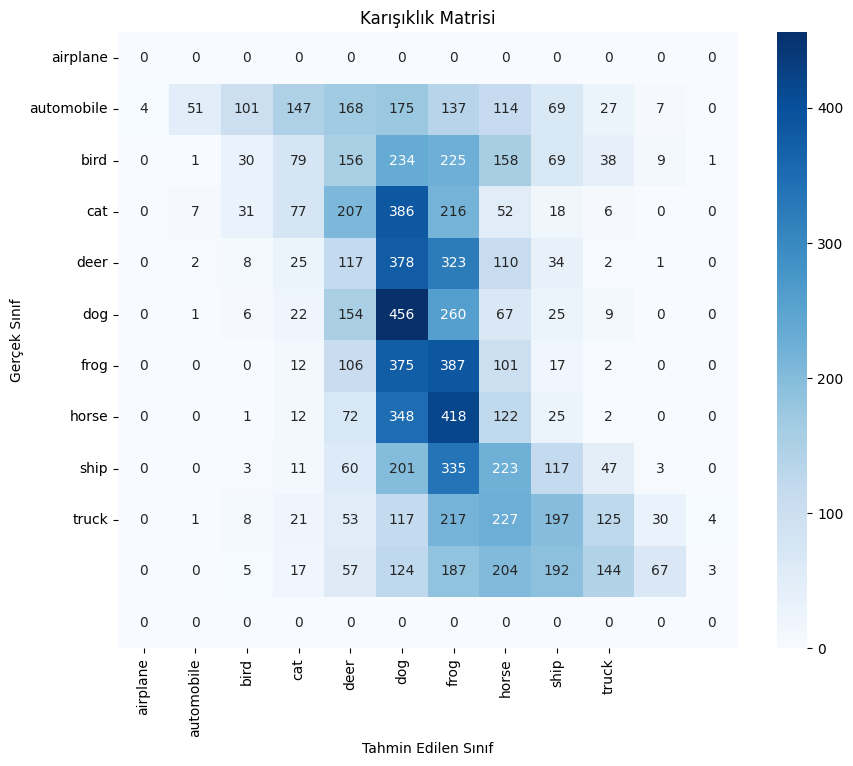

In [70]:
# Karışıklık matrisini görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'], yticklabels=[
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'])
plt.ylabel('Gerçek Sınıf')
plt.xlabel('Tahmin Edilen Sınıf')
plt.title('Karışıklık Matrisi')
plt.show()

Lojistik regresyon modeli oluşturalım

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Lojistik regresyon modelini oluşturalım
logreg = LogisticRegression(max_iter=100, multi_class='multinomial', solver='saga', n_jobs=-1)

In [ ]:
# Modeli eğitelim
logreg.fit(x_train_small, y_train_small.ravel())


LogisticRegression(multi_class='multinomial', n_jobs=-1, solver='saga')

In [ ]:
# Test verisi ile tahmin yapın
y_pred = logreg.predict(x_test_small)

In [ ]:
# Doğruluk oranını hesaplayın
accuracy = accuracy_score(y_test_small, y_pred)
print(f'Doğruluk: {accuracy * 100:.2f}%')

Doğruluk: 32.47%


In [ ]:
# Precision, Recall ve F1 Score hesaplayın ve yazdırın
report = classification_report(y_test_small, y_pred, target_names=[str(i) for i in range(10)])
print("Sınıflandırma Raporu:\n", report)


Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.40      0.40      0.40       905
           1       0.35      0.37      0.36       901
           2       0.25      0.25      0.25       906
           3       0.21      0.18      0.19       893
           4       0.28      0.29      0.28       910
           5       0.27      0.24      0.26       914
           6       0.35      0.35      0.35       899
           7       0.35      0.35      0.35       884
           8       0.41      0.48      0.44       899
           9       0.36      0.33      0.35       889

    accuracy                           0.32      9000
   macro avg       0.32      0.32      0.32      9000
weighted avg       0.32      0.32      0.32      9000



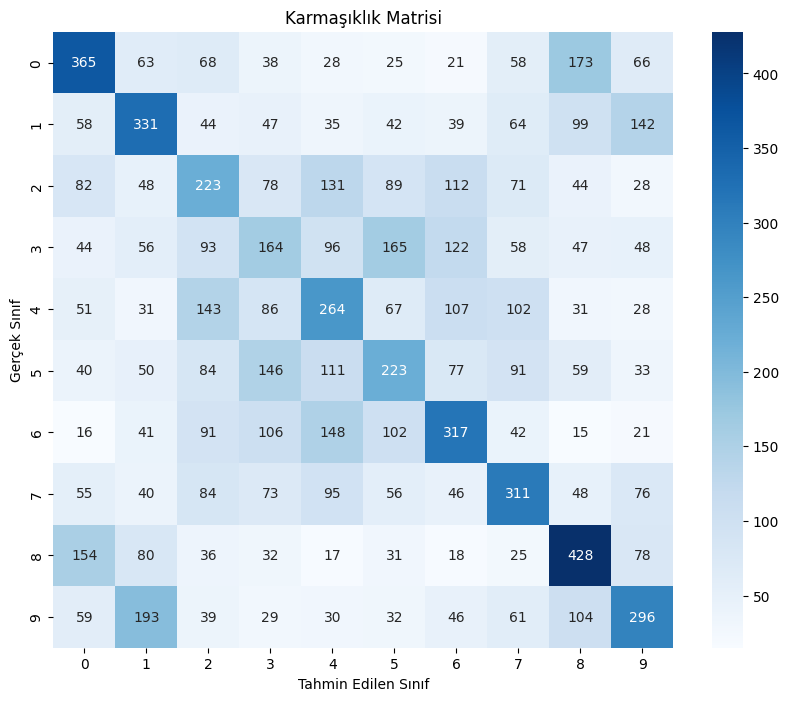

In [ ]:
# Karmaşıklık matrisini hesaplayalım ve görselleştirelim
cm = confusion_matrix(y_test_small, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()

Karar ağacı modeli oluşturalım

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Karar ağacı modelini oluşturalım
clf = DecisionTreeClassifier(random_state=42)


In [ ]:
# Modeli eğitelim
clf.fit(x_train_small, y_train_small.ravel())

DecisionTreeClassifier(random_state=42)

In [ ]:
# Test verisi ile tahmin yapalım
y_pred = clf.predict(x_test_small)

In [ ]:
# Doğruluk oranını hesaplayalım
accuracy = accuracy_score(y_test_small, y_pred)
print(f'Doğruluk: {accuracy * 100:.2f}%')


Doğruluk: 22.82%


In [ ]:
# Precision, Recall ve F1 Score hesaplayalım
report = classification_report(y_test_small, y_pred, target_names=[str(i) for i in range(10)])
print("Sınıflandırma Raporu:\n", report)

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.31      0.33      0.32       905
           1       0.23      0.19      0.20       901
           2       0.16      0.17      0.16       906
           3       0.14      0.13      0.14       893
           4       0.21      0.22      0.21       910
           5       0.19      0.19      0.19       914
           6       0.25      0.24      0.24       899
           7       0.21      0.22      0.22       884
           8       0.31      0.34      0.33       899
           9       0.26      0.26      0.26       889

    accuracy                           0.23      9000
   macro avg       0.23      0.23      0.23      9000
weighted avg       0.23      0.23      0.23      9000



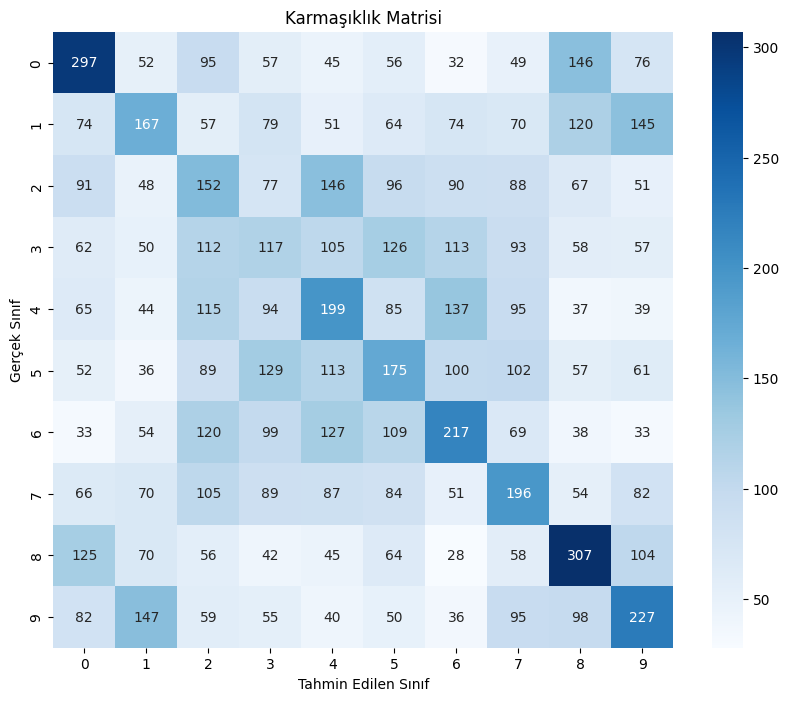

In [ ]:
# Karmaşıklık matrisini hesaplayalım ve görselleştirelim
cm = confusion_matrix(y_test_small, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()

Random forest modeli oluşturalım

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Eğitim verisini daha küçük bir setle sınırlayarak Random Forest'ın eğitim süresini kısaltalım
x_train_small = X_train[:5000]
y_train_small = y_train[:5000].ravel()

In [ ]:
# Yalnızca 1000 örnek ile test yapalım
x_test_small = X_test[:1000]
y_test_small = y_test[:1000].ravel()

In [ ]:
# Random Forest modelini oluşturalım
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

In [ ]:
# Modeli eğitelim
rf_model.fit(x_train_small, y_train_small)


RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
# Test verisi ile tahmin yapalım
y_pred = rf_model.predict(x_test_small)

In [ ]:
# Doğruluk oranını hesaplayalım
accuracy = accuracy_score(y_test_small, y_pred)
print(f'Doğruluk: {accuracy * 100:.2f}%')

Doğruluk: 42.10%


In [ ]:
# Precision, Recall ve F1 Score hesaplayalım ve yazdıralım
report = classification_report(y_test_small, y_pred, target_names=[str(i) for i in range(10)])
print("Sınıflandırma Raporu:\n", report)


Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.49      0.48      0.48       103
           1       0.53      0.47      0.50        89
           2       0.34      0.28      0.31       100
           3       0.34      0.23      0.28       103
           4       0.23      0.30      0.26        90
           5       0.36      0.34      0.35        86
           6       0.46      0.58      0.51       112
           7       0.44      0.34      0.38       102
           8       0.53      0.61      0.57       106
           9       0.46      0.52      0.49       109

    accuracy                           0.42      1000
   macro avg       0.42      0.42      0.41      1000
weighted avg       0.42      0.42      0.42      1000



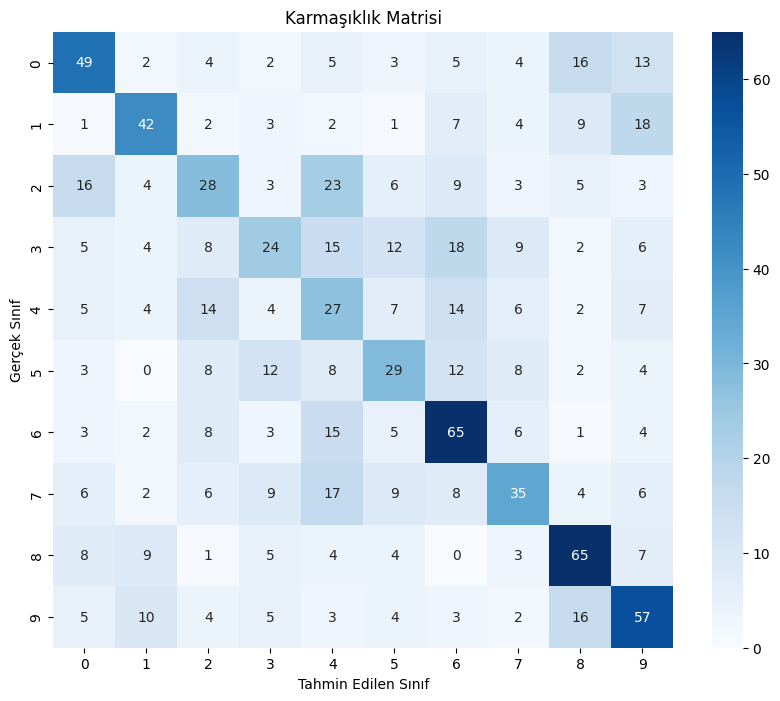

In [ ]:
# Karmaşıklık matrisini hesaplayalım ve görselleştirelim
cm = confusion_matrix(y_test_small, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()


GBM modeli oluşturalım


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# GBM modelini oluşturalım
gbm_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

In [ ]:
# Modeli eğitelim
gbm_model.fit(x_train_small, y_train_small)

GradientBoostingClassifier(random_state=42)

In [ ]:
# Test verisi ile tahmin yapın
y_pred = gbm_model.predict(x_test_small)


In [ ]:
# Doğruluk oranını hesaplayalım
accuracy = accuracy_score(y_test_small, y_pred)
print(f'Doğruluk: {accuracy * 100:.2f}%')

Doğruluk: 43.30%


In [ ]:
# Precision, Recall ve F1 Score hesaplayalım ve yazdıralım
report = classification_report(y_test_small, y_pred, target_names=[str(i) for i in range(10)])
print("Sınıflandırma Raporu:\n", report)


Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.45      0.45      0.45       103
           1       0.51      0.45      0.48        89
           2       0.32      0.30      0.31       100
           3       0.26      0.19      0.22       103
           4       0.32      0.39      0.35        90
           5       0.24      0.22      0.23        86
           6       0.50      0.60      0.54       112
           7       0.50      0.46      0.48       102
           8       0.58      0.67      0.62       106
           9       0.55      0.53      0.54       109

    accuracy                           0.43      1000
   macro avg       0.42      0.43      0.42      1000
weighted avg       0.43      0.43      0.43      1000



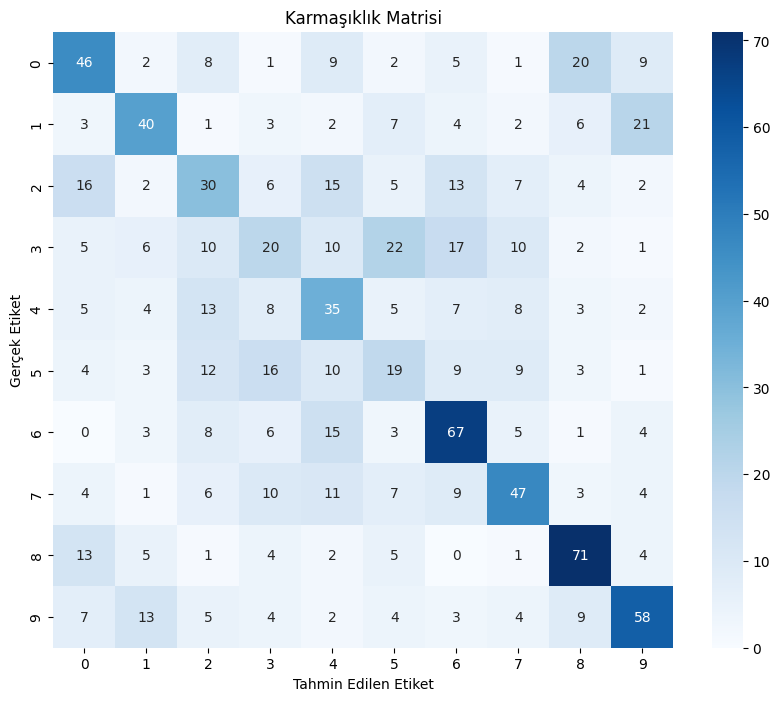

In [ ]:
# Karmaşıklık matrisini hesaplayın ve görselleştirin
cm = confusion_matrix(y_test_small, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Karmaşıklık Matrisi')
plt.show()

LightGBM modeli oluşturalım

In [ ]:
import lightgbm as lgb

In [ ]:
# LightGBM veri yapısına dönüştürelim
train_data = lgb.Dataset(x_train_small, label=y_train_small)

In [ ]:
# Model parametrelerini belirleyelim
params = {
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'num_class': 10,
    'metric': 'multi_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

In [ ]:
# Modeli eğitelim
num_round = 100
bst = lgb.train(params, train_data, num_round)

KeyboardInterrupt: 

In [ ]:
# Test verisi üzerinde tahmin yapalım
y_pred = np.argmax(bst.predict(x_test_small, num_iteration=bst.best_iteration), axis=1)

In [ ]:
# Doğruluk oranını hesaplayın
accuracy = accuracy_score(y_test_small, y_pred)
print(f'Doğruluk: {accuracy * 100:.2f}%')


Doğruluk: 44.80%


In [ ]:
# Precision, Recall ve F1 Score hesaplayın ve yazdırın
report = classification_report(y_test_small, y_pred, target_names=[str(i) for i in range(10)])
print("Sınıflandırma Raporu:\n", report)

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.49      0.49      0.49       103
           1       0.52      0.39      0.45        89
           2       0.34      0.33      0.34       100
           3       0.28      0.25      0.27       103
           4       0.32      0.38      0.35        90
           5       0.27      0.27      0.27        86
           6       0.55      0.60      0.58       112
           7       0.52      0.48      0.50       102
           8       0.63      0.62      0.63       106
           9       0.50      0.60      0.54       109

    accuracy                           0.45      1000
   macro avg       0.44      0.44      0.44      1000
weighted avg       0.45      0.45      0.45      1000



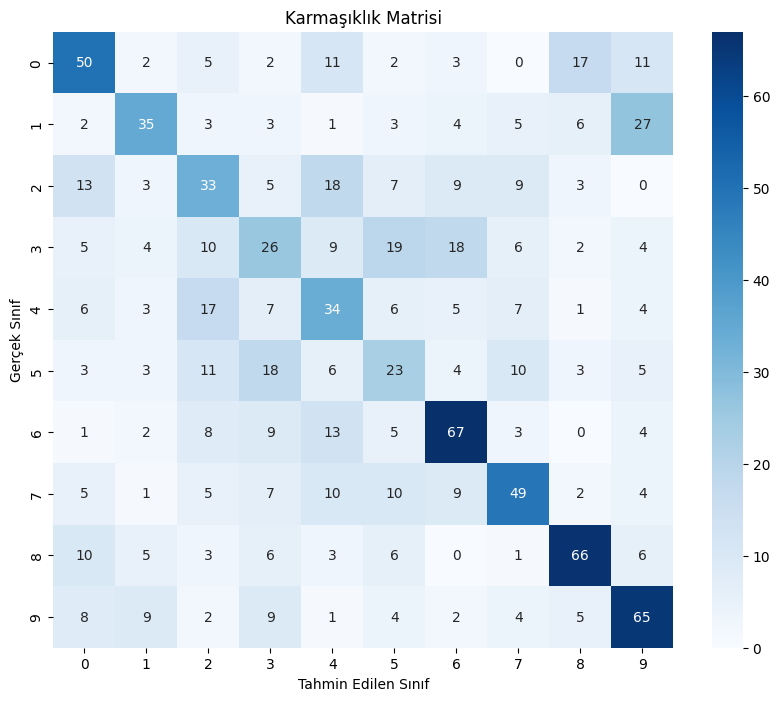

In [ ]:
# Karmaşıklık matrisini hesaplayalım ve görselleştirelim
cm = confusion_matrix(y_test_small, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()

XGBoost modeli oluşturalım

In [ ]:
import xgboost as xgb


In [ ]:
# XGBoost veri yapısına dönüştürelim
dtrain = xgb.DMatrix(x_train_small, label=y_train_small)
dtest = xgb.DMatrix(x_test_small, label=y_test_small)

In [ ]:
# Model parametrelerini belirleyelim
params = {
    'objective': 'multi:softmax',
    'num_class': 10,
    'eta': 0.1,
    'max_depth': 6,
    'eval_metric': 'mlogloss'
}

In [ ]:
# Modeli eğitelim
num_round = 100
bst = xgb.train(params, dtrain, num_round)

In [ ]:
# Test verisi üzerinde tahmin yapalım
y_pred = bst.predict(dtest)

In [ ]:
# Doğruluk oranını hesaplayalım
accuracy = accuracy_score(y_test_small, y_pred)
print(f'Doğruluk: {accuracy * 100:.2f}%')


Doğruluk: 44.80%


In [ ]:
# Precision, Recall ve F1 Score hesaplayalım ve yazdıralım
report = classification_report(y_test_small, y_pred, target_names=[str(i) for i in range(10)])
print("Sınıflandırma Raporu:\n", report)


Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.45      0.48      0.46       103
           1       0.58      0.40      0.48        89
           2       0.40      0.40      0.40       100
           3       0.28      0.24      0.26       103
           4       0.34      0.42      0.38        90
           5       0.32      0.29      0.30        86
           6       0.49      0.60      0.54       112
           7       0.48      0.38      0.42       102
           8       0.60      0.64      0.62       106
           9       0.53      0.56      0.54       109

    accuracy                           0.45      1000
   macro avg       0.45      0.44      0.44      1000
weighted avg       0.45      0.45      0.44      1000



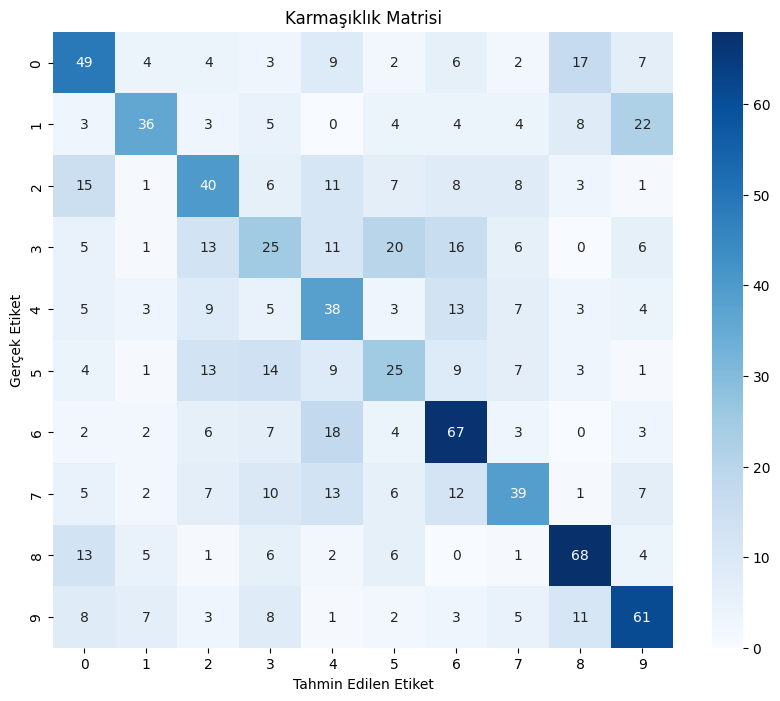

In [ ]:
# Karmaşıklık matrisini hesaplayalım ve görselleştirelim
cm = confusion_matrix(y_test_small, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Karmaşıklık Matrisi')
plt.show()

CatBoost modeli oluşturalım

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.1 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier, Pool

In [ ]:
# Model parametrelerini belirleyelim
model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    loss_function='MultiClass',
    verbose=0
)

In [ ]:
# Modeli eğitelim
model.fit(x_train_small, y_train_small)

In [ ]:
# Test verisi üzerinde tahmin yapalım
y_pred = model.predict(x_test_small)

In [ ]:
# Doğruluk oranını hesaplayalım
accuracy = accuracy_score(y_test_small, y_pred)
print(f'Doğruluk: {accuracy * 100:.2f}%')

Doğruluk: 39.90%


In [ ]:
# Precision, Recall ve F1 Score hesaplayalım ve yazdıralım
report = classification_report(y_test_small, y_pred, target_names=[str(i) for i in range(10)])
print("Sınıflandırma Raporu:\n", report)


Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.45      0.47      0.46       103
           1       0.53      0.47      0.50        89
           2       0.24      0.21      0.23       100
           3       0.36      0.14      0.20       103
           4       0.25      0.29      0.27        90
           5       0.27      0.29      0.28        86
           6       0.43      0.56      0.48       112
           7       0.41      0.38      0.40       102
           8       0.51      0.58      0.54       106
           9       0.47      0.55      0.51       109

    accuracy                           0.40      1000
   macro avg       0.39      0.39      0.39      1000
weighted avg       0.39      0.40      0.39      1000



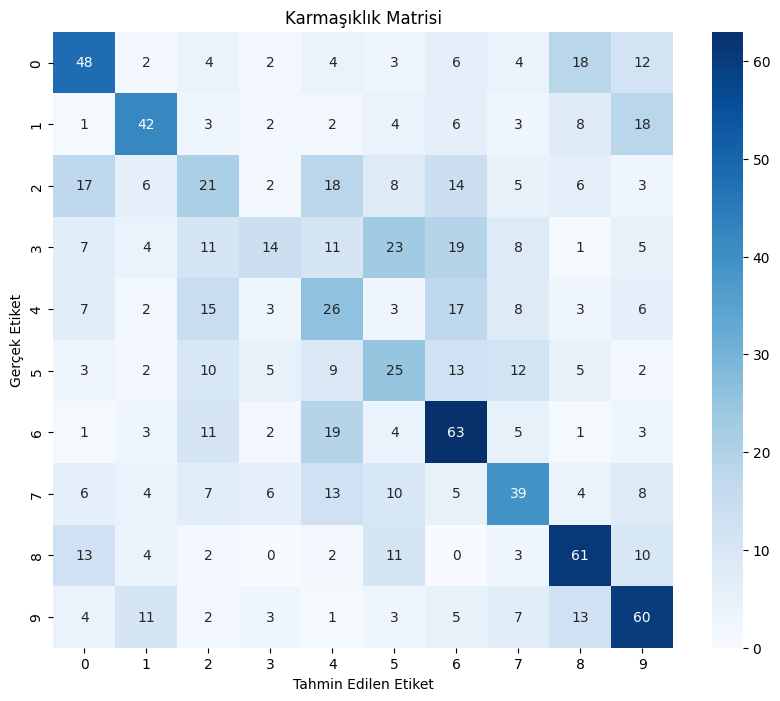

In [ ]:
# Karmaşıklık matrisini hesaplayalım ve görselleştirelim
cm = confusion_matrix(y_test_small, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Karmaşıklık Matrisi')
plt.show()

**YSA modeli oluşturalım**

In [24]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [33]:
# CIFAR-10 veri setini yükleyelim
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Verileri normalleştirelim (0-255 aralığında olan piksel değerlerini 0-1 aralığına getirelim)
x_train, x_test = x_train / 255.0, x_test / 255.0

In [34]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [35]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [36]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 68s 42ms/step - loss: 1.5062 - accuracy: 0.4517 - val_loss: 1.2529 - val_accuracy: 0.5453
Epoch 2/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.1392 - accuracy: 0.5986 - val_loss: 1.0419 - val_accuracy: 0.6345
Epoch 3/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.9930 - accuracy: 0.6524 - val_loss: 1.0501 - val_accuracy: 0.6387
Epoch 4/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.9045 - accuracy: 0.6829 - val_loss: 0.9482 - val_accuracy: 0.6683
Epoch 5/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8319 - accuracy: 0.7096 - val_loss: 0.9144 - val_accuracy: 0.6812
Epoch 6/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7769 - accuracy: 0.7266 - val_loss: 0.8727 - val_accuracy: 0.7039
Epoch 7/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7288 - accuracy: 0.7450 - val_loss: 0.8897 -

In [37]:

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Doğruluk: {test_acc}')

313/313 - 3s - loss: 0.9126 - accuracy: 0.7029 - 3s/epoch - 10ms/step
Doğruluk: 0.7028999924659729


In [38]:
# Precision, Recall ve F1 Score hesaplayalım
precision = precision_score(y_test, y_pred_classes, average=None)
recall = recall_score(y_test, y_pred_classes, average=None)
f1 = f1_score(y_test, y_pred_classes, average=None)

In [39]:
# Precision, Recall ve F1 Score değerlerini görselleştirelim
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


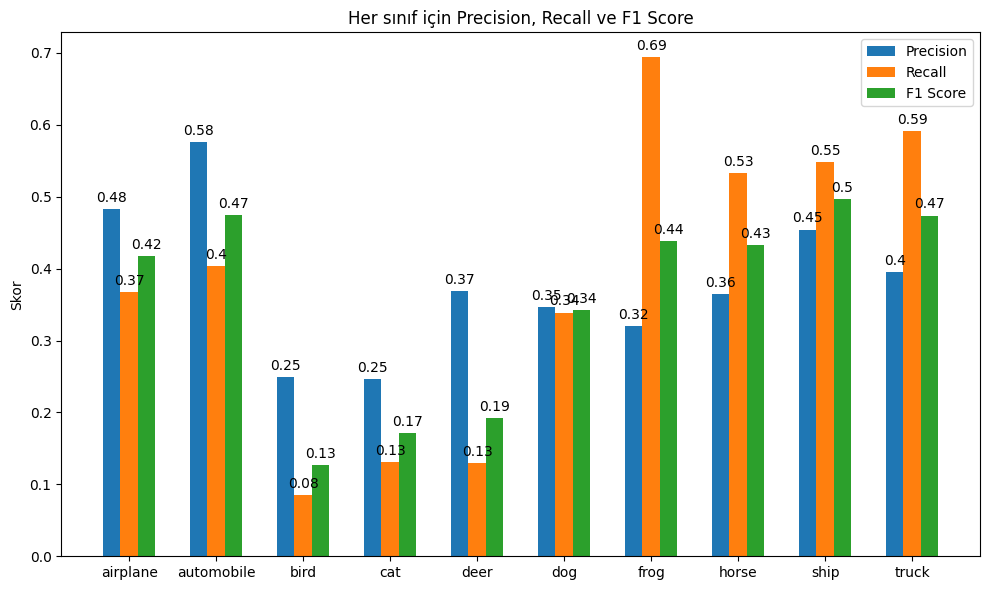

In [41]:
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1, width, label='F1 Score')

# Eksenler ve başlıkları ayarlayalım
ax.set_ylabel('Skor')
ax.set_title('Her sınıf için Precision, Recall ve F1 Score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Çubukların üzerine değerleri yazalım
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

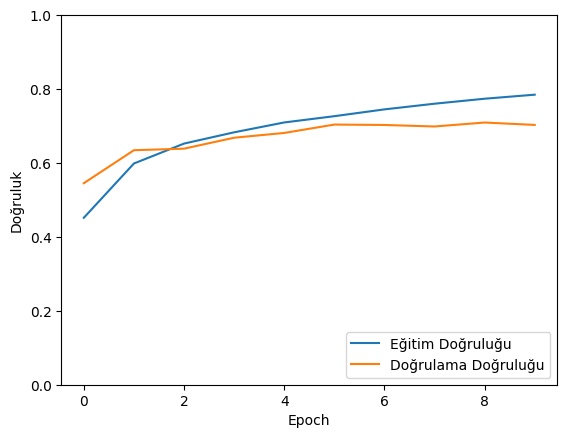

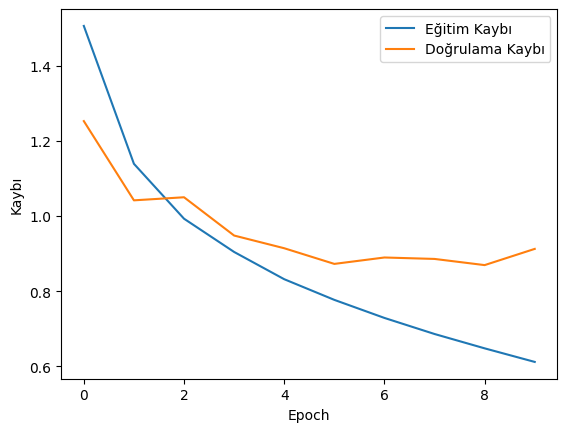

In [42]:
# Eğitim sonuçlarının görselleştirilmesi
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kaybı')
plt.legend(loc='upper right')
plt.show()

## **CNN modeli oluşturalım**

In [45]:
# tek boyutlu hale getirelim
y_train = y_train.flatten()
y_test = y_test.flatten()

In [46]:
model = models.Sequential()

# İlk evrişim  katmanı
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# İkinci evrişim katmanı
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Üçüncü evrişim katmanı
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Tam bağlı katmanlar
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))  # 10 sınıf için

In [47]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [48]:
hist = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 71s 44ms/step - loss: 1.5267 - accuracy: 0.4419 - val_loss: 1.3223 - val_accuracy: 0.5187
Epoch 2/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.1417 - accuracy: 0.5960 - val_loss: 1.0533 - val_accuracy: 0.6295
Epoch 3/10
1563/1563 [==============================] - 94s 60ms/step - loss: 0.9878 - accuracy: 0.6544 - val_loss: 0.9864 - val_accuracy: 0.6523
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8823 - accuracy: 0.6926 - val_loss: 0.9214 - val_accuracy: 0.6839
Epoch 5/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8118 - accuracy: 0.7168 - val_loss: 0.8881 - val_accuracy: 0.6954
Epoch 6/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7538 - accuracy: 0.7357 - val_loss: 1.0036 - val_accuracy: 0.6567
Epoch 7/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7010 - accuracy: 0.7534 - val_loss: 0.8548 -

In [49]:
# Test verileri üzerinde modelin performansını değerlendirelim
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Doğruluk: {test_acc}')

313/313 - 6s - loss: 0.8908 - accuracy: 0.7093 - 6s/epoch - 19ms/step
Doğruluk: 0.7092999815940857


In [50]:
# Tahminler yapalım
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 [==============================] - 3s 11ms/step


In [51]:
# Sınıflandırma raporu oluşturalım
report = classification_report(y_test, y_pred_classes, target_names=[
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
])

print(report)

              precision    recall  f1-score   support

    airplane       0.70      0.79      0.74      1000
  automobile       0.86      0.82      0.84      1000
        bird       0.67      0.58      0.62      1000
         cat       0.50      0.51      0.50      1000
        deer       0.64      0.69      0.67      1000
         dog       0.56      0.66      0.61      1000
        frog       0.82      0.73      0.78      1000
       horse       0.72      0.78      0.75      1000
        ship       0.85      0.79      0.82      1000
       truck       0.86      0.73      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



In [52]:
# Precision, Recall ve F1 Score hesaplayalım
precision = precision_score(y_test, y_pred_classes, average=None)
recall = recall_score(y_test, y_pred_classes, average=None)
f1 = f1_score(y_test, y_pred_classes, average=None)

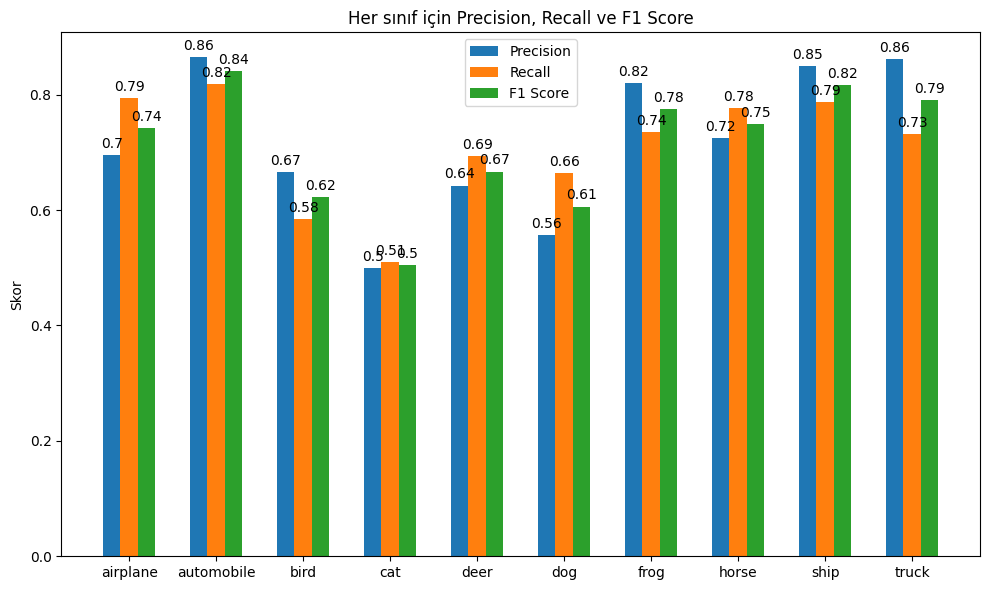

In [53]:
# Precision, Recall ve F1 Score değerlerini görselleştirelim
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

x = np.arange(len(labels))
width = 0.2  # Çubukların genişliği

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1, width, label='F1 Score')

# Eksenler ve başlıkları ayarlayalım
ax.set_ylabel('Skor')
ax.set_title('Her sınıf için Precision, Recall ve F1 Score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Çubukların üzerine değerleri yazalım
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

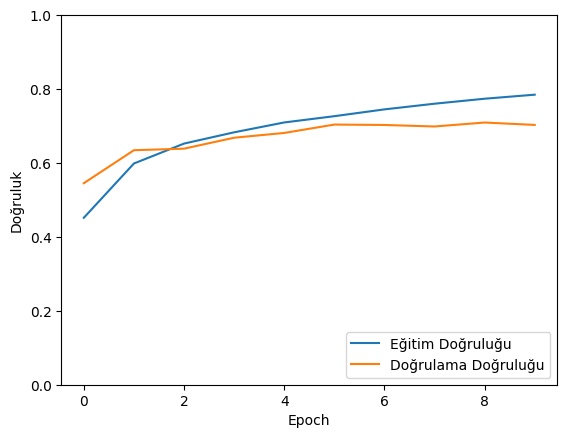

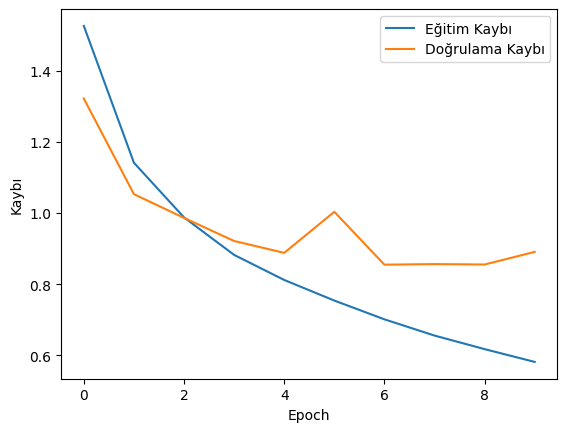

In [54]:
# Eğitim sonuçlarının görselleştirilmesi
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(hist.history['loss'], label='Eğitim Kaybı')
plt.plot(hist.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kaybı')
plt.legend(loc='upper right')
plt.show()